<a href="https://colab.research.google.com/github/thdfydgh/NorthKoreaDA/blob/main/NorthKoreaDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Project]  북한 기상 데이터 분석 - 시각화편






**프로젝트 목표**


*  북한의 기온, 기압, 바람, 강수량 등의 전문자료를 시간 자료로 탐색적 데이터 분석(EDA) 기법을 적용하여 시각화 프로젝트 수행




#**1. 데이터 읽기**

In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/gddrive')


Mounted at /content/gddrive


In [2]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import csv
# 한글 포트 설정
plt.rc('font', family='NanumBarunGothic') 

In [3]:
# csv 파일 읽기, 데이터 타입 확인
fp = '/content/gddrive/MyDrive/Dataset/NorthWeatherData.csv'
data = pd.read_csv(fp, encoding = 'euc-kr')
print(data.dtypes)
data.shape

지점               int64
일시              object
전운량(할)         float64
최저운고(할)        float64
중하층운량(할)       float64
하층운형           float64
중층운형           float64
상층운형           float64
기온(°C)         float64
풍향(36방위)         int64
풍속(m/s)          int64
해면기압(hPa)      float64
현지기압(hPa)      float64
12시간강수량(mm)    float64
상대습도(%)        float64
이슬점온도(°C)      float64
시정(10m)          int64
dtype: object


(16092, 17)

In [4]:
# 열 이름 출력
data.columns.values

array(['지점', '일시', '전운량(할)', '최저운고(할)', '중하층운량(할)', '하층운형', '중층운형',
       '상층운형', '기온(°C)', '풍향(36방위)', '풍속(m/s)', '해면기압(hPa)', '현지기압(hPa)',
       '12시간강수량(mm)', '상대습도(%)', '이슬점온도(°C)', '시정(10m)'], dtype=object)

In [5]:
# 데이터 확인. 첫 5개 데이터
data.head()

,지점,일시,전운량(할),최저운고(할),중하층운량(할),하층운형,중층운형,상층운형,기온(°C),풍향(36방위),풍속(m/s),해면기압(hPa),현지기압(hPa),12시간강수량(mm),상대습도(%),이슬점온도(°C),시정(10m)
0,3,2022-12-31 03:00,0.0,9.0,NaN,NaN,NaN,NaN,-12.7,0,0,1026.2,1025.8,NaN,85.0,-14.7,3000
1,3,2022-12-31 06:00,0.0,9.0,NaN,NaN,NaN,NaN,-13.3,0,0,1026.2,1025.8,NaN,85.0,-15.3,3000
2,3,2022-12-31 09:00,0.0,9.0,NaN,NaN,NaN,NaN,-6.8,32,3,1025.8,1025.4,NaN,69.0,-11.5,3000
3,3,2022-12-31 12:00,0.0,9.0,NaN,NaN,NaN,NaN,1.0,14,2,1024.0,1023.6,NaN,38.0,-11.6,3000
4,3,2022-12-31 15:00,0.0,9.0,NaN,NaN,NaN,NaN,0.9,0,0,1022.2,1021.8,NaN,68.0,-4.4,3000


In [6]:
# 데이터 확인. 마지막 5개 데이터
data.tail()

,지점,일시,전운량(할),최저운고(할),중하층운량(할),하층운형,중층운형,상층운형,기온(°C),풍향(36방위),풍속(m/s),해면기압(hPa),현지기압(hPa),12시간강수량(mm),상대습도(%),이슬점온도(°C),시정(10m)
16087,75,2023-03-15 00:00,0.0,9.0,NaN,NaN,NaN,NaN,3.8,0,0,1017.5,975.1,NaN,80.0,0.6,3000
16088,75,2023-03-15 03:00,0.0,9.0,NaN,NaN,NaN,NaN,2.7,0,0,1016.7,974.1,NaN,85.0,0.4,3000
16089,75,2023-03-15 06:00,10.0,5.0,10.0,4.0,NaN,NaN,2.5,0,0,1016.7,974.1,NaN,85.0,0.2,3000
16090,75,2023-03-15 09:00,10.0,5.0,10.0,4.0,NaN,NaN,5.1,23,4,1017.3,975.1,NaN,80.0,1.9,3000
16091,75,2023-03-15 12:00,10.0,5.0,10.0,0.0,2.0,NaN,7.4,23,5,1018.0,976.1,NaN,81.0,4.3,500


#**2. 데이터 정제**

**# 2.1 결측값 확인**

In [7]:
data[['지점', '일시', '전운량(할)', '최저운고(할)', '중하층운량(할)', '하층운형', '중층운형',
       '상층운형', '기온(°C)', '풍향(36방위)', '풍속(m/s)', '해면기압(hPa)', '현지기압(hPa)',
       '12시간강수량(mm)', '상대습도(%)', '이슬점온도(°C)', '시정(10m)']].isna().sum()



지점                 0
일시                 0
전운량(할)             1
최저운고(할)          102
중하층운량(할)        8610
하층운형            8610
중층운형           10839
상층운형           12546
기온(°C)             0
풍향(36방위)           0
풍속(m/s)            0
해면기압(hPa)          0
현지기압(hPa)          0
12시간강수량(mm)    14856
상대습도(%)            1
이슬점온도(°C)          0
시정(10m)            0
dtype: int64

**# 2.2 결측값 확인 및 제거**

In [8]:
data.dropna(axis = 1, inplace = True)
#결측값 확인
# data[['지점', '일시', '전운량(할)', '최저운고(할)', '중하층운량(할)', '하층운형', '중층운형',
#        '상층운형', '기온(°C)', '풍향(36방위)', '풍속(m/s)', '해면기압(hPa)', '현지기압(hPa)',
#        '12시간강수량(mm)', '상대습도(%)', '이슬점온도(°C)', '시정(10m)']].isna().sum()
print(data.shape)
print(data.columns.values)
data.head()
data.tail()

(16092, 9)
['지점' '일시' '기온(°C)' '풍향(36방위)' '풍속(m/s)' '해면기압(hPa)' '현지기압(hPa)'
 '이슬점온도(°C)' '시정(10m)']


,지점,일시,기온(°C),풍향(36방위),풍속(m/s),해면기압(hPa),현지기압(hPa),이슬점온도(°C),시정(10m)
16087,75,2023-03-15 00:00,3.8,0,0,1017.5,975.1,0.6,3000
16088,75,2023-03-15 03:00,2.7,0,0,1016.7,974.1,0.4,3000
16089,75,2023-03-15 06:00,2.5,0,0,1016.7,974.1,0.2,3000
16090,75,2023-03-15 09:00,5.1,23,4,1017.3,975.1,1.9,3000
16091,75,2023-03-15 12:00,7.4,23,5,1018.0,976.1,4.3,500


#**3. 데이터 시각화**

**# 평균 기온 데이터의 시각화.**
*   시간별 평균 기온을 그래프로 그리기.
*   일자별 평균 기온을 시각화
*   월별 평균 기온을 시각화
*   지역별로 확인








In [35]:
# '일시_dt' 열을 인덱스로 지정하기, ['일시'] 열을 datetime 타입으로 변경
data['일시_dt'] = pd.to_datetime(data['일시'])
data.set_index('일시_dt', inplace=True)
data.head()

,지점,일시,기온(°C),풍향(36방위),풍속(m/s),해면기압(hPa),현지기압(hPa),이슬점온도(°C),시정(10m)
일시_dt,,,,,,,,,
2022-12-31 03:00:00,3,2022-12-31 03:00,-12.7,0,0,1026.2,1025.8,-14.7,3000
2022-12-31 06:00:00,3,2022-12-31 06:00,-13.3,0,0,1026.2,1025.8,-15.3,3000
2022-12-31 09:00:00,3,2022-12-31 09:00,-6.8,32,3,1025.8,1025.4,-11.5,3000
2022-12-31 12:00:00,3,2022-12-31 12:00,1.0,14,2,1024.0,1023.6,-11.6,3000
2022-12-31 15:00:00,3,2022-12-31 15:00,0.9,0,0,1022.2,1021.8,-4.4,3000


##**3.1시간별 평균 기온을 시각화**

In [36]:
# 시간별로 모든 관측지역의 평균 기온을 구하기
Hour_temp = round(data['기온(°C)'].resample('3H').mean(), 2)
Hour_temp.head()

일시_dt
2022-12-31 03:00:00   -11.96
2022-12-31 06:00:00   -12.10
2022-12-31 09:00:00   -11.19
2022-12-31 12:00:00    -4.63
2022-12-31 15:00:00    -0.70
Freq: 3H, Name: 기온(°C), dtype: float64

In [15]:
# 시간별 평균 기온에서 가장 낮은 기온과 가장 높은 기온을 구하기
print(Hour_temp.min(),'°C')
print('')
print(Hour_temp.max(),'°C')

-21.58 °C

14.1 °C


In [23]:
# 시간별 평균 기온에서 기온이 가장 낮은 날짜와 기온이 가장 높은 날짜 구하기
min_Hour = Hour_temp.loc[Hour_temp == -21.58]
print(min_Hour)
max_Hour = Hour_temp.loc[Hour_temp == 14.1]
print(max_Hour)

일시_dt
2023-01-25 06:00:00   -21.58
Freq: 3H, Name: 기온(°C), dtype: float64
일시_dt
2023-03-07 15:00:00    14.1
Freq: 3H, Name: 기온(°C), dtype: float64


In [37]:
# 시간별 평균 기온 데이터 인덱스 재설정 하여 '일시' 데이터를 열로 만들기
Hour_temp = Hour_temp.reset_index()
Hour_temp.head()

,일시_dt,기온(°C)
0,2022-12-31 03:00:00,-11.96
1,2022-12-31 06:00:00,-12.10
2,2022-12-31 09:00:00,-11.19
3,2022-12-31 12:00:00,-4.63
4,2022-12-31 15:00:00,-0.70


<ipython-input-40-c9854136eb25>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


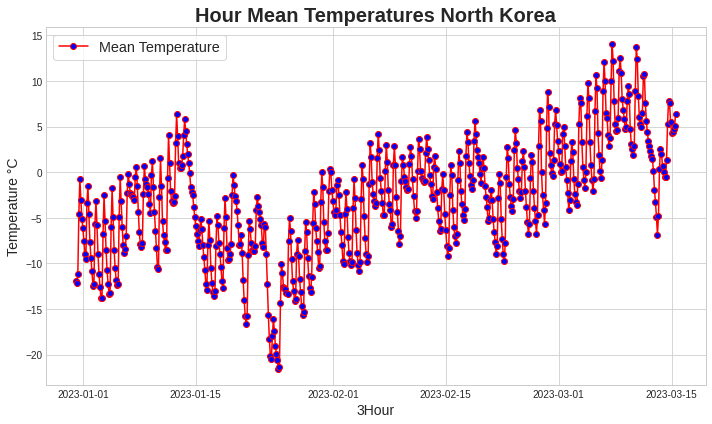

In [40]:
#그래프 스타일 지정하기
plt.style.use('seaborn-whitegrid')

#그래프 속성 설정하기
fig, ax = plt.subplots(1, figsize = (10,6))

# X축, Y축 데이터 지정하기
x = Hour_temp.일시_dt
y = Hour_temp['기온(°C)']
#그래프 데이터와 속성 결정하기
plt.plot(x,y,color = 'red', linestyle = '-', marker = 'o', mfc = "blue")
# 그래프 제목 및 속성 설정하기
plt.title('Hour Mean Temperatures North Korea', fontdict = {'fontsize' : 20, 'weight' :'bold'})

# X축, Y축에 제목 설정하기
plt.xlabel('3Hour', fontdict = {'fontsize' : 14})
plt.ylabel('Temperature °C', fontdict = {'fontsize' : 14})

# 그래프안에 데이터 설명(레전드) 넣기
plt.legend(['Mean Temperature'], frameon = True, fontsize = 'x-large')

plt.tight_layout()

##**3.2 일자 별 평균 기온을 시각화**

In [39]:
# 2022년 12월 31일의 데이터 확인
data.iloc[0:7]

,지점,일시,기온(°C),풍향(36방위),풍속(m/s),해면기압(hPa),현지기압(hPa),이슬점온도(°C),시정(10m)
일시_dt,,,,,,,,,
2022-12-31 03:00:00,3,2022-12-31 03:00,-12.7,0,0,1026.2,1025.8,-14.7,3000
2022-12-31 06:00:00,3,2022-12-31 06:00,-13.3,0,0,1026.2,1025.8,-15.3,3000
2022-12-31 09:00:00,3,2022-12-31 09:00,-6.8,32,3,1025.8,1025.4,-11.5,3000
2022-12-31 12:00:00,3,2022-12-31 12:00,1.0,14,2,1024.0,1023.6,-11.6,3000
2022-12-31 15:00:00,3,2022-12-31 15:00,0.9,0,0,1022.2,1021.8,-4.4,3000
2022-12-31 18:00:00,3,2022-12-31 18:00,-3.2,0,0,1022.1,1021.7,-6.0,3000
2022-12-31 21:00:00,3,2022-12-31 21:00,-7.6,0,0,1022.9,1022.5,-9.8,3000


In [44]:
# 일자별로 모든 관측지역의 평균 기온을 구하기
daily_temp = round(data['기온(°C)'].resample('D').mean(), 2)
daily_temp.head()

#print(data.resample(rule='3H',kind='timestamp').sum().index)
# index메서드를 통해 인덱스 정보 확인 가능
#DatetimeIndex(data['일시'],dtype='datetime64[ns]', freq='3T')
# 분류가 DatetimeIndex 이며 dtype='datetime`으로 설정됨.


일시_dt
2022-12-31   -6.95
2023-01-01   -6.17
2023-01-02   -8.55
2023-01-03   -9.33
2023-01-04   -8.85
Freq: D, Name: 기온(°C), dtype: float64

In [45]:
# 일자별 평균 기온에서 가장 낮은 기온과 가장 높은 기온을 구하기
print(daily_temp.min(),'°C')
print('')
print(daily_temp.max(),'°C')

-18.14 °C

7.86 °C


In [46]:
# 일자별 평균 기온에서 기온이 가장 낮은 날짜와 기온이 가장 높은 날짜 구하기
min_daily = daily_temp.loc[daily_temp == -18.14]
print(min_daily)
print(' ')
max_daily = daily_temp.loc[daily_temp == 7.86]
print(max_daily)

일시_dt
2023-01-24   -18.14
Freq: D, Name: 기온(°C), dtype: float64
 
일시_dt
2023-03-08    7.86
Freq: D, Name: 기온(°C), dtype: float64


In [47]:
# 일자별 평균 기온 데이터 인덱스 재설정 하여 '일시' 데이터를 열로 만들기
daily_temp = daily_temp.reset_index()
daily_temp.head()

,일시_dt,기온(°C)
0,2022-12-31,-6.95
1,2023-01-01,-6.17
2,2023-01-02,-8.55
3,2023-01-03,-9.33
4,2023-01-04,-8.85


<ipython-input-48-3a45e188e7e3>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


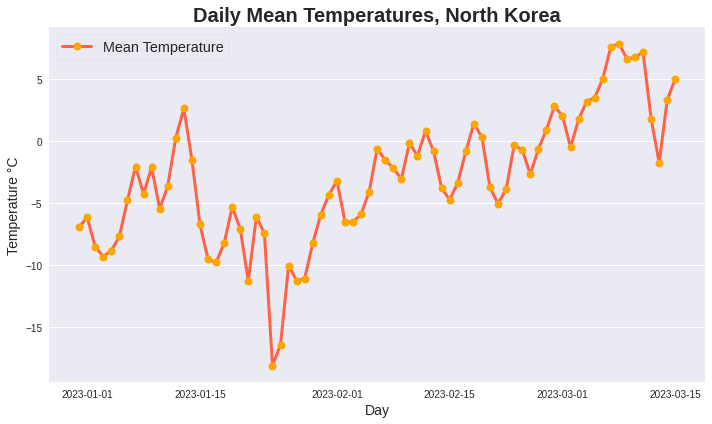

In [48]:
# 그래프 스타일 지정하기
plt.style.use('seaborn')

# 그래프 속성 설정하기
fig, ax = plt.subplots(1, figsize=(10, 6))

# X축, Y축 데이터 지정하기
x = daily_temp.일시_dt
y = daily_temp['기온(°C)']

# 그래프 데이터와 속성 설정하기
plt.plot(x, y, color = 'tomato',  linestyle='-', marker='o',  mfc='orange', linewidth = 3, markersize = 8)

plt.grid(axis = 'x')

# 그래프 제목 및 속성 설정하기
plt.title('Daily Mean Temperatures, North Korea', fontdict={'fontsize': 20, 'weight': 'bold'})

# X, Y축에 제목 설정하기
plt.xlabel('Day', fontdict={'fontsize': 14})
plt.ylabel('Temperature °C', fontdict={'fontsize': 14})

# 그래프안에 데이터 설명(레전드) 넣기
plt.legend(['Mean Temperature'], frameon=True, fontsize='x-large')

plt.tight_layout()